## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bikesharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike_sharing_df = pd.read_csv("day.csv")

In [4]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Inspect the various aspects of the housing dataframe

In [5]:
bike_sharing_df.shape

(730, 16)

In [6]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping unnecessary columns based on information given in readme.txt and outcome of info and describe above

1. instant -> unique identifier of a row and hence can e dropped
2. dteday -> we already have 3 columns representing this 1 column -> day, month and year. Hence this column can be dropped.
3.temp -> temp and atemp will be stringly correlated because atemp might be slightly varying from  temp. Since atemp is what the users feel, lets keep atemp and drop temp column.
4. casual, registered -> cnt is sum of casual and registered, they are constitute the target vairable that needs to be predicted and hence cannot be part of input feed.

In [8]:
# As mentioned above lets drop instant, dteday, temp, casual, registered
bike_sharing_df.drop(['instant','dteday','temp','casual','registered'], axis = 1, inplace = True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [10]:
continuous_vars = ['atemp','hum','windspeed','cnt']

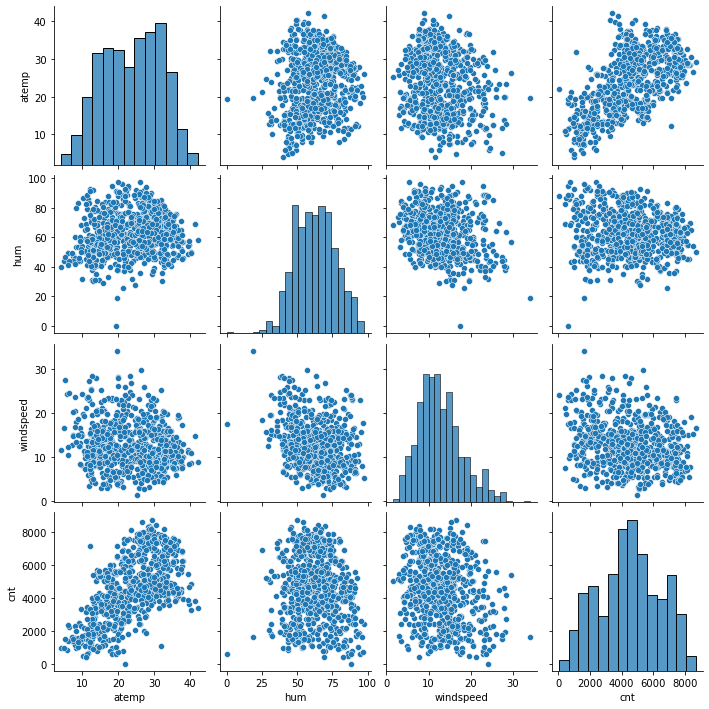

In [11]:
sns.pairplot(bike_sharing_df[continuous_vars])
plt.show()

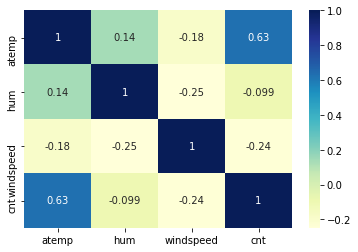

In [12]:
sns.heatmap(bike_sharing_df[continuous_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

###### Inference from pairplot and heatmap of numeric variables:
    1. cnt and atemp have a very strong positive correlation
    2. There is some positive correlation between atemp and hum -> which we can decide to rule out or
    keep only after analysing VIF and p value 

In [13]:
def getBoxPlots(ncols, nrows, data, columns, titles, rotation, hue=None):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows)
    if(ncols == 1 and nrows == 1):
       boxPlot = sns.boxplot(data=bike_sharing_df[columns[0]], hue=hue)
       boxPlot.set_title(titles[0],weight='bold', y = -0.2, rotation = rotation)

    else:
        for i in range(nrows):
            for j in range(ncols):
                boxPlot = sns.boxplot(data=bike_sharing_df[columns[i+j]],ax = ax[j], hue=hue)
                if len(titles) > 0:
                    boxPlot.set_title(titles[i+j],weight='bold', y = -0.2, rotation = rotation)
        
    
    fig.tight_layout()
    plt.show()

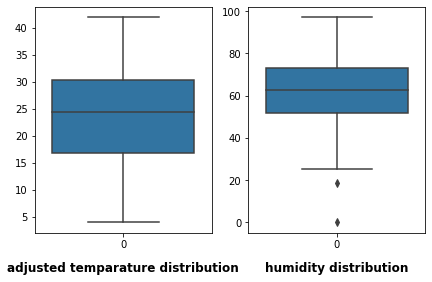

In [14]:
getBoxPlots(2,1,bike_sharing_df,['atemp','hum'],['adjusted temparature distribution','humidity distribution'], rotation=0)

###### Outlier Analysis for continuous variables:
    1. Adjusted temparature which is a string factor has no outliers
    2. Humidity has some values which are too low and are outliers 

### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables -> season,year,month, holiday,weekday,workingday,weathersit

###### Lets first map the ctaegorical values from numbers to their actual String values so that we can make better sense of the visualizations.

In [15]:
#==============================Season Mapping=======================================#
# Defining the season map function
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

# Applying the function to the bike_sharing_df season column
bike_sharing_df['season'] = bike_sharing_df['season'].map(season_map)

#=============================Month Mapping==========================================#
# Defining the month map function
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June',7:'Jul',8:'Aug',
            9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# Applying the function to the bike_sharing_df month column
bike_sharing_df['mnth'] = bike_sharing_df['mnth'].map(month_map)


#=============================Weekday Mapping==========================================#
# Defining the weekday map function
weekday_map = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',
              5:'Friday',6:'Saturday'}

# Applying the function to the bike_sharing_df month column
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].map(weekday_map)


#=============================Weather Mapping==========================================#

# Defining the weathersit map function
weathersit_map = {1: 'Clear, Few clouds',
                 2: 'Mist,Cloudy',
                 3:'Light Snow, Light Rain',
                 4: 'Heavy Rain,Ice Pallets'}

# Applying the function to the bike_sharing_df month column
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].map(weathersit_map)

#### Boxplot Visualization

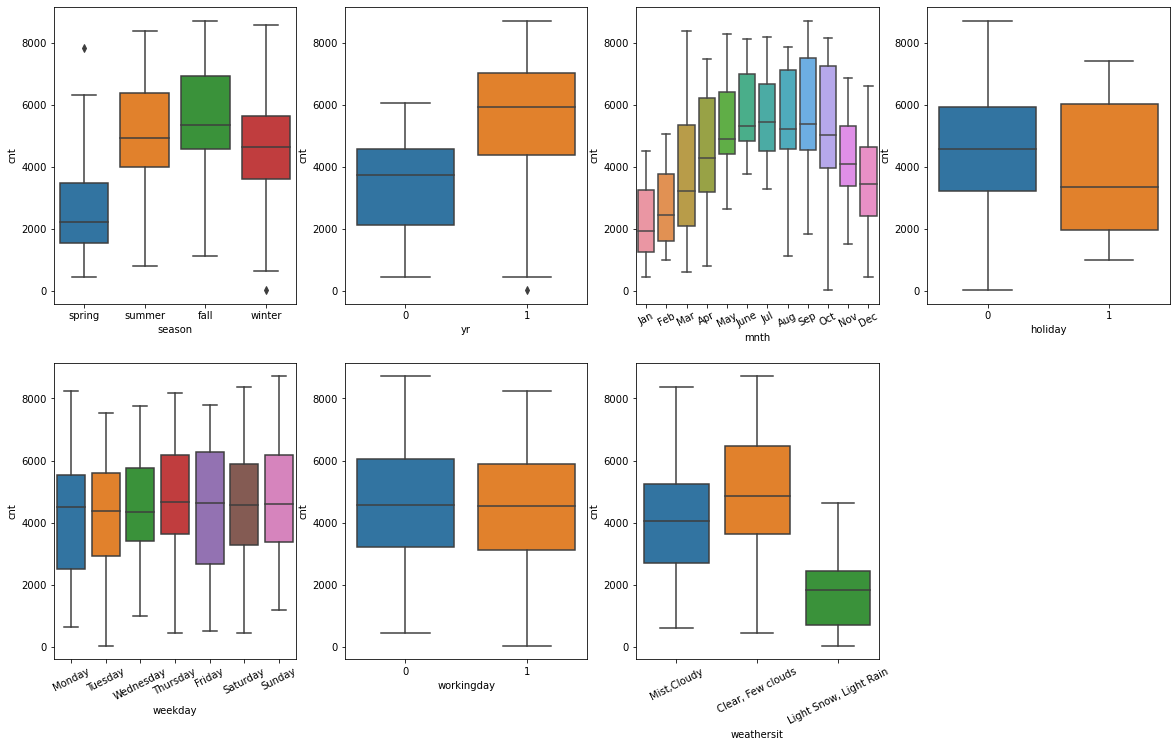

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,3)
ax = sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=27)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,5)
ax= sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=27)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,7)
ax = sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=27)
plt.show()

###### Inferences from above graph for categorical variables:
    1. Summer and fall seasons have higher demand for shared bike service. Demand is lowest in spring
    2. Demand for bike has increased in 2019 in comparison to 2018
    3. July sees the highest median for bike service.
    4. Non holiday days have higher median for bike demand.
    5. Median is almost same for all days of the week though on Friday we see a highest IQR meaning there is a huge difference in usage pattern
    6. Median for workingday is sligthly higher than non working day for shared bike service.
    7. We can see tat on clear day with few clouds median is highest while it is lowest for days when light snow is present on the road
    

### Dummy Variables

###### Need to get dummy variables for Season , Month, Weekday and Weathersit as they are non binary categorical variables 


In [17]:
season = pd.get_dummies(bike_sharing_df['season'],drop_first = True)

In [19]:
month = pd.get_dummies(bike_sharing_df['mnth'],drop_first = True)

In [21]:
weekdy = pd.get_dummies(bike_sharing_df['weekday'],drop_first = True)

In [23]:
weathersit = pd.get_dummies(bike_sharing_df['weathersit'],drop_first = True)

In [24]:
# Add the results to the original bike sharing dataframe

bike_sharing_df = pd.concat([bike_sharing_df, month,weekdy,weathersit], axis = 1)

In [26]:
bike_sharing_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

## Step 4: Splitting the Data into Training and Testing Sets

Lets perform the first basic step for regression is performing a train-test split.

In [30]:
bike_sharing_df.columns
#Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
#       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
#       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
#       'Wednesday', 'Light Snow, Light Rain', 'Mist,Cloudy'],
#      dtype='object')
bike_sharing_df.

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow, Light Rain', 'Mist,Cloudy'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features  - Min-Max scaling 


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [31]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain","Mist,Cloudy"
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain","Mist,Cloudy"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('June', False, 9),
 ('Mar', True, 1),
 ('May', False, 3),
 ('Nov', False, 7),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 8),
 ('Tuesday', False, 2),
 ('Wednesday', False, 11),
 ('Light Snow, Light Rain', True, 1),
 ('Mist,Cloudy', True, 1)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Dec', 'Feb', 'Jan',
       'Jul', 'Mar', 'Oct', 'Sep', 'Monday', 'Light Snow, Light Rain',
       'Mist,Cloudy'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'June', 'May', 'Nov', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics